### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [403]:
# ### Data Collection
# import pandas_datareader as pdr
# key=""

In [404]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [283]:
# df.to_csv('AAPL.csv')

In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('Tesla.csv')

In [33]:
df.head()

,Date,Close,Volume,Open,High,Low
0,08/16/2024,$216.12,88765120,$211.15,$219.80,$210.80
1,08/15/2024,$214.14,89848530,$205.02,$215.88,$204.82
2,08/14/2024,$201.38,70250010,$207.39,$208.44,$198.75
3,08/13/2024,$207.83,76247390,$198.47,$208.49,$197.06
4,08-12-2024,$197.49,64044900,$199.02,$199.26,$194.67


In [34]:
df['Close'] = df['Close'].str.replace('$', '').str.replace(',', '').astype(float)


In [35]:
df.tail()

,Date,Close,Volume,Open,High,Low
2512,08/22/2014,17.1187,42495894,$16.9693,$17.13,$16.8407
2513,08/21/2014,16.9560,43660043,$17.1013,$17.2533,$16.884
2514,08/20/2014,17.0473,45192817,$16.978,$17.2493,$16.8667
2515,08/19/2014,17.1173,79991150,$17.258,$17.2887,$16.7747
2516,08/18/2014,17.3293,87462931,$17.55,$17.8173,$17.3167


In [36]:
df1=df.reset_index()['Close']

In [37]:
df1

0       216.1200
1       214.1400
2       201.3800
3       207.8300
4       197.4900
          ...   
2512     17.1187
2513     16.9560
2514     17.0473
2515     17.1173
2516     17.3293
Name: Close, Length: 2517, dtype: float64

In [38]:
df

,Date,Close,Volume,Open,High,Low
0,08/16/2024,216.1200,88765120,$211.15,$219.80,$210.80
1,08/15/2024,214.1400,89848530,$205.02,$215.88,$204.82
2,08/14/2024,201.3800,70250010,$207.39,$208.44,$198.75
3,08/13/2024,207.8300,76247390,$198.47,$208.49,$197.06
4,08-12-2024,197.4900,64044900,$199.02,$199.26,$194.67
...,...,...,...,...,...,...
2512,08/22/2014,17.1187,42495894,$16.9693,$17.13,$16.8407
2513,08/21/2014,16.9560,43660043,$17.1013,$17.2533,$16.884
2514,08/20/2014,17.0473,45192817,$16.978,$17.2493,$16.8667
2515,08/19/2014,17.1173,79991150,$17.258,$17.2887,$16.7747


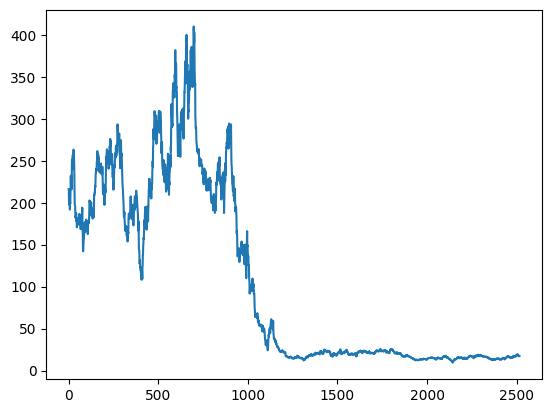

In [39]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [40]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [41]:
import numpy as np

In [42]:
df1

0       216.1200
1       214.1400
2       201.3800
3       207.8300
4       197.4900
          ...   
2512     17.1187
2513     16.9560
2514     17.0473
2515     17.1173
2516     17.3293
Name: Close, Length: 2517, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
print(df1)

[[0.51584947]
 [0.51090431]
 [0.47903555]
 ...
 [0.01865497]
 [0.0188298 ]
 [0.01935928]]


In [45]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(1636, 881)

In [47]:
train_data

array([[0.51584947],
       [0.51090431],
       [0.47903555],
       ...,
       [0.03181882],
       [0.0319387 ],
       [0.03170143]])

In [88]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [89]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [90]:
print(X_train.shape), print(y_train.shape)

(1335, 300)
(1335,)


(None, None)

In [91]:
print(X_test.shape), print(ytest.shape)

(580, 300)
(580,)


(None, None)

In [92]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [96]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
model=Sequential()
model.add(LSTM(150,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(150,return_sequences=True))
model.add(LSTM(150))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [98]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 300, 150)            │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 300, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452,551 (1.73 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 300, 150)            │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 300, 150)            │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452,551 (1.73 MB)

 Trainable params: 452,551 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0696 - val_loss: 9.0355e-05
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 0.0064 - val_loss: 2.7931e-05
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0026 - val_loss: 2.4934e-05
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - loss: 0.0020 - val_loss: 2.2312e-05
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0020 - val_loss: 1.1198e-05
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0022 - val_loss: 1.3814e-05
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0017 - val_loss: 9.9298e-06
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0014 - val_loss: 8.3769e-06
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0015 - val_loss: 7.2729e-06
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - loss: 0.0016 - val_loss: 9.4317e-06
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - loss: 0.0015 - val_loss: 8.7480e-06
Epoch 12/100
21/21 

In [103]:
import tensorflow as tf

In [104]:
tf.__version__

'2.16.0-rc0'

In [105]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step


In [106]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [115]:
len(train_predict)
len(test_predict)

580

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mse = mean_squared_error(ytest, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, test_predict)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 231.21090866115873
Root Mean Squared Error: 15.205620956118784
Mean Absolute Error: 15.120329215150402


In [235]:
# Save the model to an HDF5 file
model.save('stock_prediction_model.keras')

In [107]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

178.739209074472

In [108]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15.205620956118784

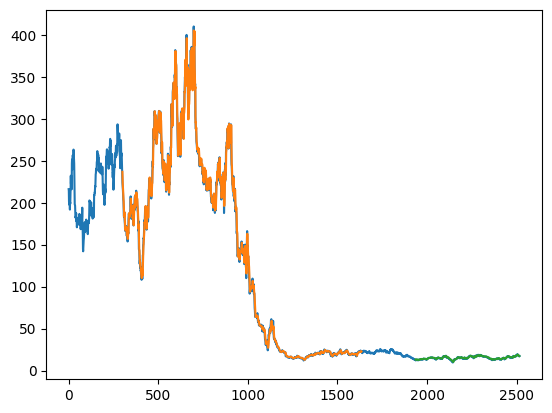

In [126]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+150:len(train_predict)+look_back+150, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*4)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [127]:
len(test_data)

881

In [223]:
x_input=test_data[731:].reshape(1,-1)
x_input.shape


(1, 150)

In [224]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [225]:
temp_input

[0.009317618733641033,
 0.00905937181562069,
 0.008654768327039503,
 0.009497442506343778,
 0.008501668365002293,
 0.00866326000519491,
 0.007494405482627028,
 0.007892265579731859,
 0.008336829906691445,
 0.007767387959799397,
 0.007860546664269021,
 0.008360057143998883,
 0.009483955723391075,
 0.00978466103218845,
 0.009305880237367382,
 0.008933744929968627,
 0.009935263441827009,
 0.010576385142560287,
 0.010005194908989188,
 0.010063387879877723,
 0.010600361645587326,
 0.01222801654378709,
 0.011328148414553738,
 0.010121830606006108,
 0.010103348718256109,
 0.010006943195668246,
 0.009858588583188475,
 0.011510469739655135,
 0.01209140042758097,
 0.012289706088033727,
 0.012269725668844534,
 0.012874133349317664,
 0.01246778157405742,
 0.012436062658594576,
 0.011200773242222618,
 0.00997847109832364,
 0.010244959939259526,
 0.00927416132190453,
 0.010374832663989291,
 0.01046973965513796,
 0.009593848028931647,
 0.00964879418170193,
 0.008808118044316565,
 0.00803537533217447,

In [226]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01902878]
151
1 day input [0.00905937 0.00865477 0.00949744 0.00850167 0.00866326 0.00749441
 0.00789227 0.00833683 0.00776739 0.00786055 0.00836006 0.00948396
 0.00978466 0.00930588 0.00893374 0.00993526 0.01057639 0.01000519
 0.01006339 0.01060036 0.01222802 0.01132815 0.01012183 0.01010335
 0.01000694 0.00985859 0.01151047 0.0120914  0.01228971 0.01226973
 0.01287413 0.01246778 0.01243606 0.01120077 0.00997847 0.01024496
 0.00927416 0.01037483 0.01046974 0.00959385 0.00964879 0.00880812
 0.00803538 0.00822519 0.00802539 0.008162   0.01008686 0.0097472
 0.01048797 0.01114658 0.01120227 0.01125722 0.01105916 0.01259441
 0.0131104  0.01308043 0.01365986 0.01401127 0.01308543 0.01287064
 0.01314212 0.01259091 0.01241958 0.01034811 0.00901442 0.0100519
 0.01054467 0.01085761 0.01101745 0.0121913  0.01177022 0.01332694
 0.01408794 0.01425778 0.01461243 0.0146474  0.01679179 0.01744465
 0.01738621 0.01715818 0.01650208 0.01748961 0.01732802 0.01898639
 0.018367   0.01914948 0.01798737 0

In [227]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [228]:
import matplotlib.pyplot as plt

In [229]:
len(df1)

2517

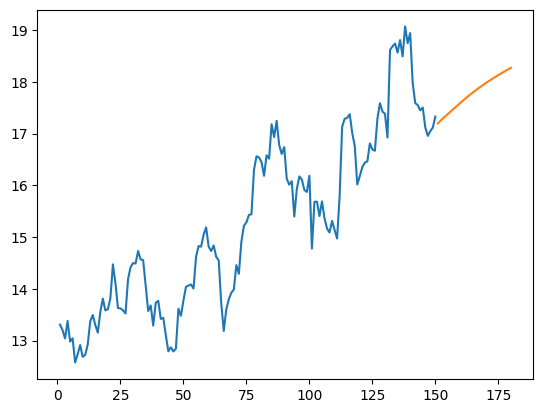

In [230]:
plt.plot(day_new,scaler.inverse_transform(df1[2367:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

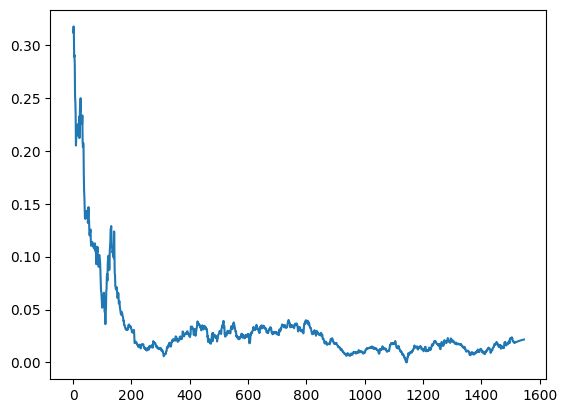

In [231]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [232]:
df3=scaler.inverse_transform(df3).tolist()

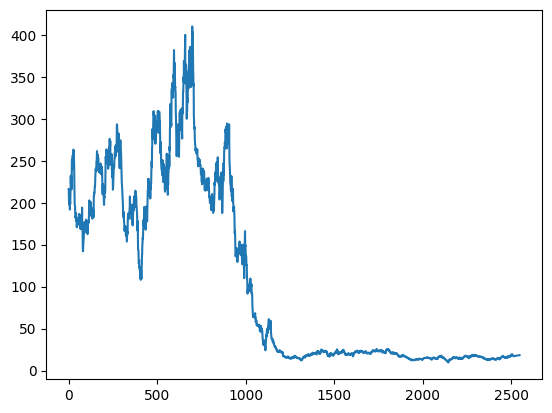

In [233]:
plt.plot(df3)